In [1]:
import os
directory = 'C:\\Users\\giorg\\OneDrive\\Υπολογιστής\\DL Project'
os.chdir(directory)

from Scripts import Utilities as ut
from Scripts import Feature_Extraction as fe
from Scripts import Model_Training as mt
from Scripts import data_loading as dl
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout

C:\Users\giorg\miniconda3\envs\tf\Lib\site-packages\pyAudioAnalysis\..\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Transfer Leraning 
We will now use tranfer learning to transfer knowledge of this model to train urabnsound 8k


In [9]:
# Load Urban Sound
dataset = "urbansound8k"
classes = ["children_playing", "drilling", "street_music", "siren", "gun_shot", "car_horn", "air_conditioner", "engine_idling",  "dog_bark", "jackhammer"]


x_train, x_val, y_train, y_val =  dl.load_data("UrbanSound\Features\CNN_Features", dataset)

Load our based saved model 

In [3]:
model = mt.model_load("Models\\tes_model.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 98, 32)       320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 47, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 59, 45, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 29, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 27, 20, 128)      

In [4]:
freeze_layers = 2

mt.freeze_and_delete_layers(model, freeze_layers)

Now add whatever layers you want to the model

In [5]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu', name = 'conv232'))
model.add(MaxPooling2D(2, 2, name = 'maxpool212'))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

learning_rate= 0.00005
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=([mt.f1_score],['accuracy']))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 98, 32)       320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 61, 47, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 21, 128)       73856     
                                                                 
 conv232 (Conv2D)            (None, 26, 19, 128)      

In [6]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_f1_score', mode='max', patience=10, verbose=1)

hist = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50, callbacks = early_stopping,
    batch_size=32
    )

Epoch 1/50
153/153 [==============================] - 9s 20ms/step - loss: 1.6421 - f1_score: 0.2415 - accuracy: 0.4058 - val_loss: 1.2420 - val_f1_score: 0.4521 - val_accuracy: 0.5601
Epoch 2/50
153/153 [==============================] - 2s 16ms/step - loss: 1.0427 - f1_score: 0.5726 - accuracy: 0.6482 - val_loss: 0.9985 - val_f1_score: 0.5925 - val_accuracy: 0.6665
Epoch 3/50
153/153 [==============================] - 3s 17ms/step - loss: 0.7831 - f1_score: 0.7040 - accuracy: 0.7462 - val_loss: 0.9038 - val_f1_score: 0.6600 - val_accuracy: 0.6808
Epoch 4/50
153/153 [==============================] - 3s 17ms/step - loss: 0.6023 - f1_score: 0.7930 - accuracy: 0.8102 - val_loss: 0.7570 - val_f1_score: 0.7381 - val_accuracy: 0.7605
Epoch 5/50
153/153 [==============================] - 2s 16ms/step - loss: 0.4554 - f1_score: 0.8501 - accuracy: 0.8583 - val_loss: 0.6163 - val_f1_score: 0.7939 - val_accuracy: 0.8025
Epoch 6/50
153/153 [==============================] - 3s 18ms/step - loss: 

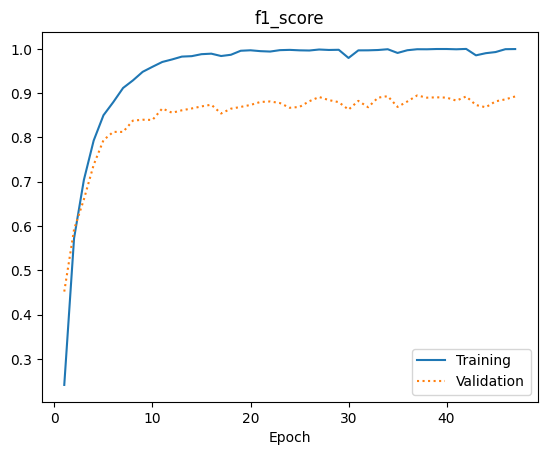

In [7]:
# Plots for evaluating the model

_ = hist.history['f1_score']
c = hist.history['val_f1_score']
mt.plot_training_history(_,c,"f1_score")

66/66 [==============================] - 0s 5ms/step
Accuracy: 0.8916984732824428


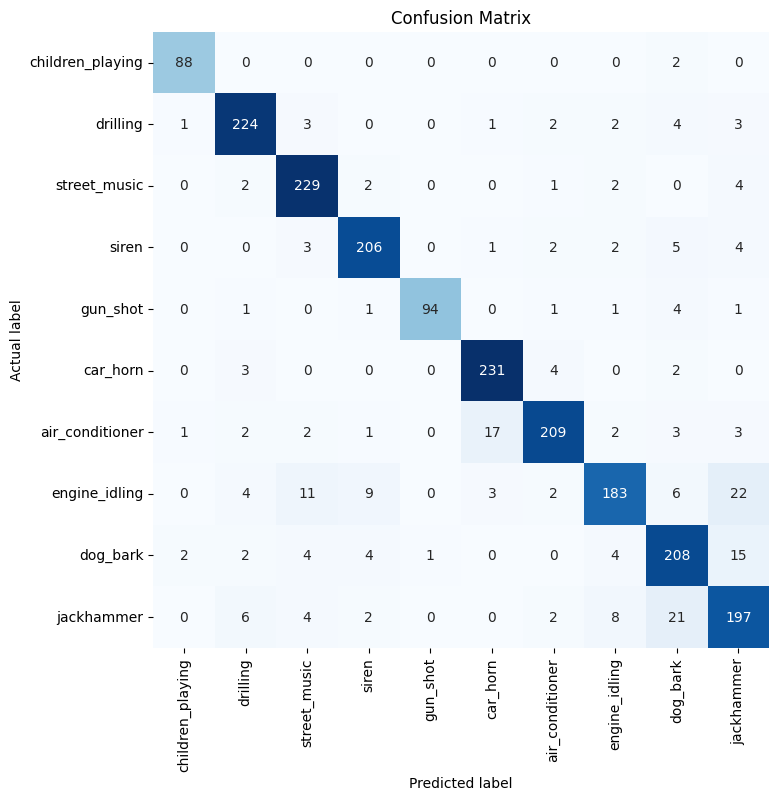

In [10]:
# Confusion Matrix

mt.plot_confusion_matrix(model,x_val,y_val,classes)

In [ ]:
model = mt.model_load("Models\\Transfer_Learning.h5")